# **DETEKSI PATAH TULANG (YOLOV8s-30 Epoch)**

* **2105551052 / Kadek Cahyadi Yogachandra**
* **2105551065 / I Kadek Krisna Apriana Dwi Guna**
* **2105551078 / Made Asthito Yogi Prasanna**
* **Viskom B / Kelompok 12**
---

> **Sumber Dataset: https://universe.roboflow.com/fracture-uofxm/bone-fracture-detection-ivsy6/dataset/1**

## **Import Library & Dataset**

In [1]:
import ultralytics                    # Library untuk model YOLO
from ultralytics import YOLO          # Import class YOLO
import matplotlib.pyplot as plt       # Library untuk visualisasi grafik
import matplotlib.image as mpimg      # Library untuk membaca dan menampilkan gambar
import random                         # Library untuk memilih elemen secara acak
import os                             # Library untuk manipulasi sistem file
import glob                           # Library untuk mencari file sesuai pola
import cv2                            # OpenCV untuk pengolahan citra

In [2]:
ultralytics.checks()

Ultralytics 8.3.49  Python-3.10.11 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Setup complete  (16 CPUs, 15.7 GB RAM, 220.4/260.6 GB disk)


In [3]:
# Load dataset
train_dir = 'FrakturTulang/train/images'
valid_dir = 'FrakturTulang/valid/images'
test_dir = 'FrakturTulang/test/images'

## **EDA**

In [4]:
# Fungsi untuk menghitung total gambar
def total_images(directory):
    image_types = ('*.png', '*.jpg', '*.jpeg')                              # Format file gambar yang didukung
    image_files = []                                                        # Daftar untuk menyimpan file gambar
    for image_type in image_types:
        image_files.extend(glob.glob(os.path.join(directory, image_type)))  # Cari file sesuai format
    return len(image_files)                                                 # Kembalikan jumlah file

In [5]:
train_images = total_images(train_dir)
valid_images = total_images(valid_dir)
test_images = total_images(test_dir)

print(f"Jumlah data train: {train_images}")
print(f"Jumlah data valid: {valid_images}")
print(f"Jumlah data test: {test_images}")

Jumlah data train: 781
Jumlah data valid: 99
Jumlah data test: 156


In [6]:
# Fungsi untuk menampilkan 20 gambar secara acak
def random_imgs(target_dir):
  random_images = random.sample(os.listdir(target_dir), 20)

  plt.figure(figsize=(15, 10))

  for i in range(20):
    plt.subplot(4, 5, i + 1)
    img = mpimg.imread(os.path.join(target_dir, random_images[i]))
    plt.imshow(img)
    #plt.title(random_images[i])
    plt.axis('off')

  plt.show()

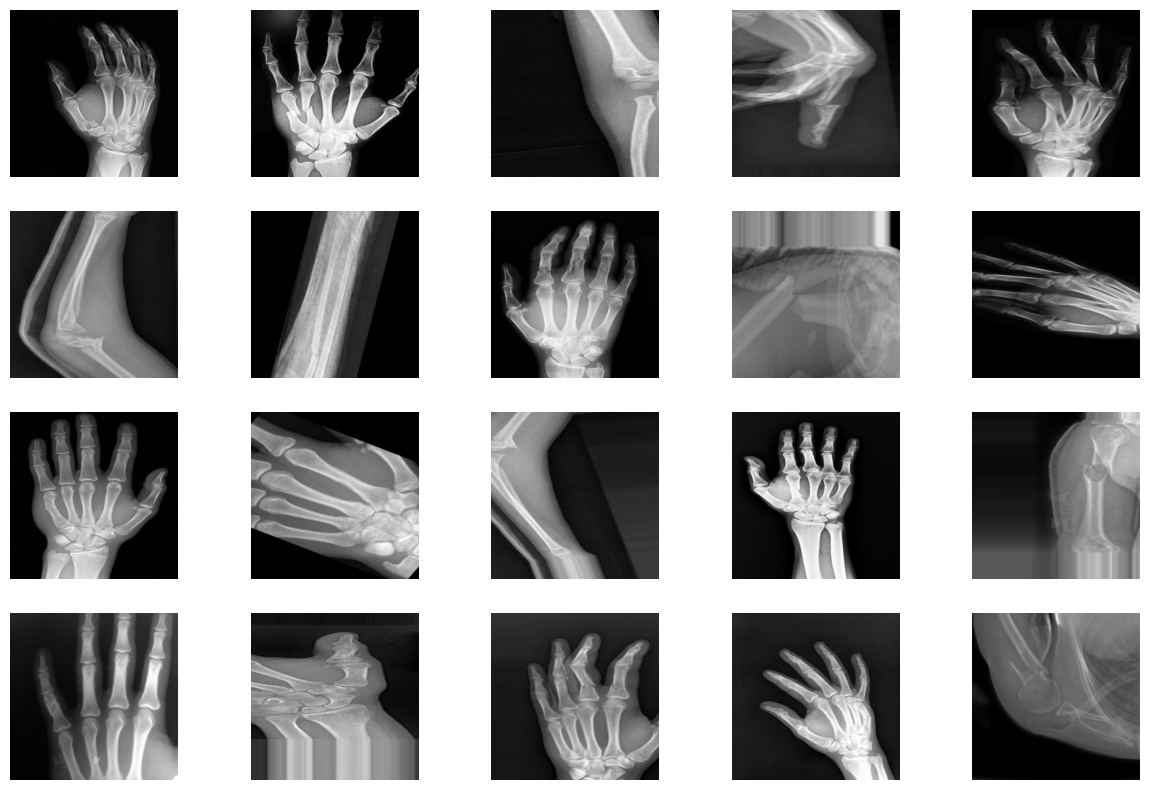

In [7]:
random_imgs(train_dir)

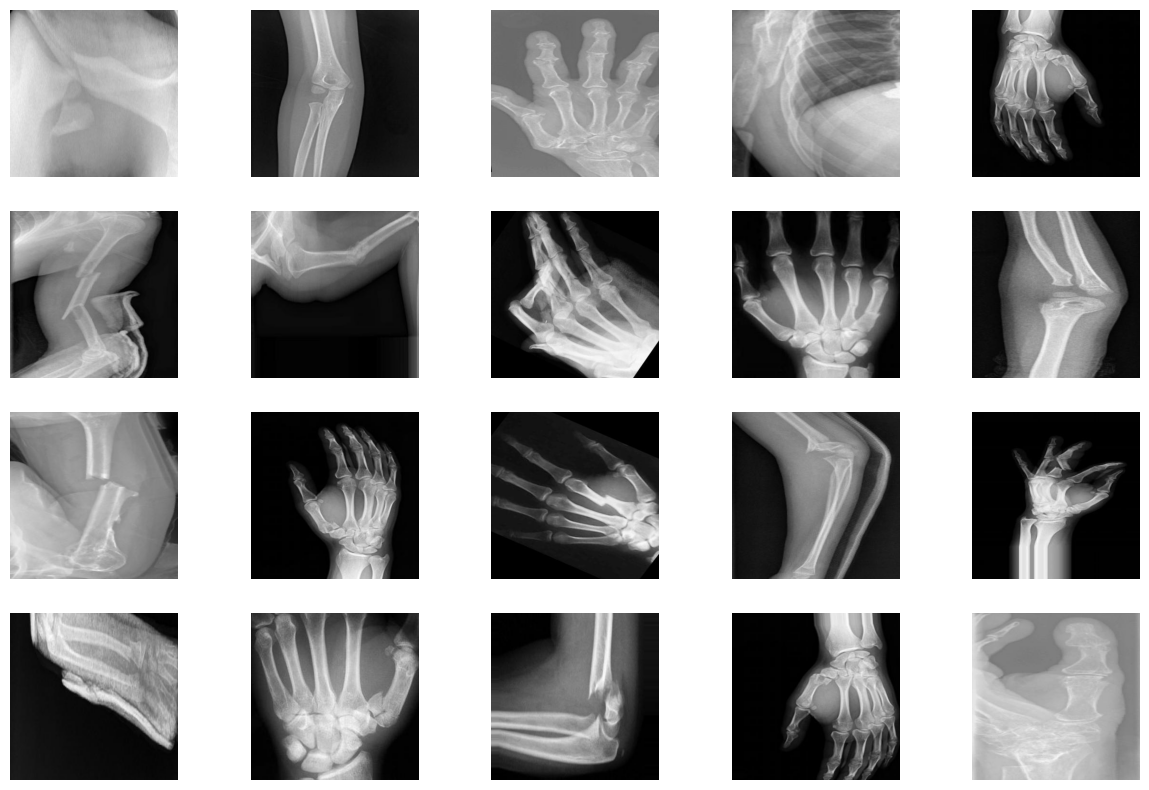

In [8]:
random_imgs(valid_dir)

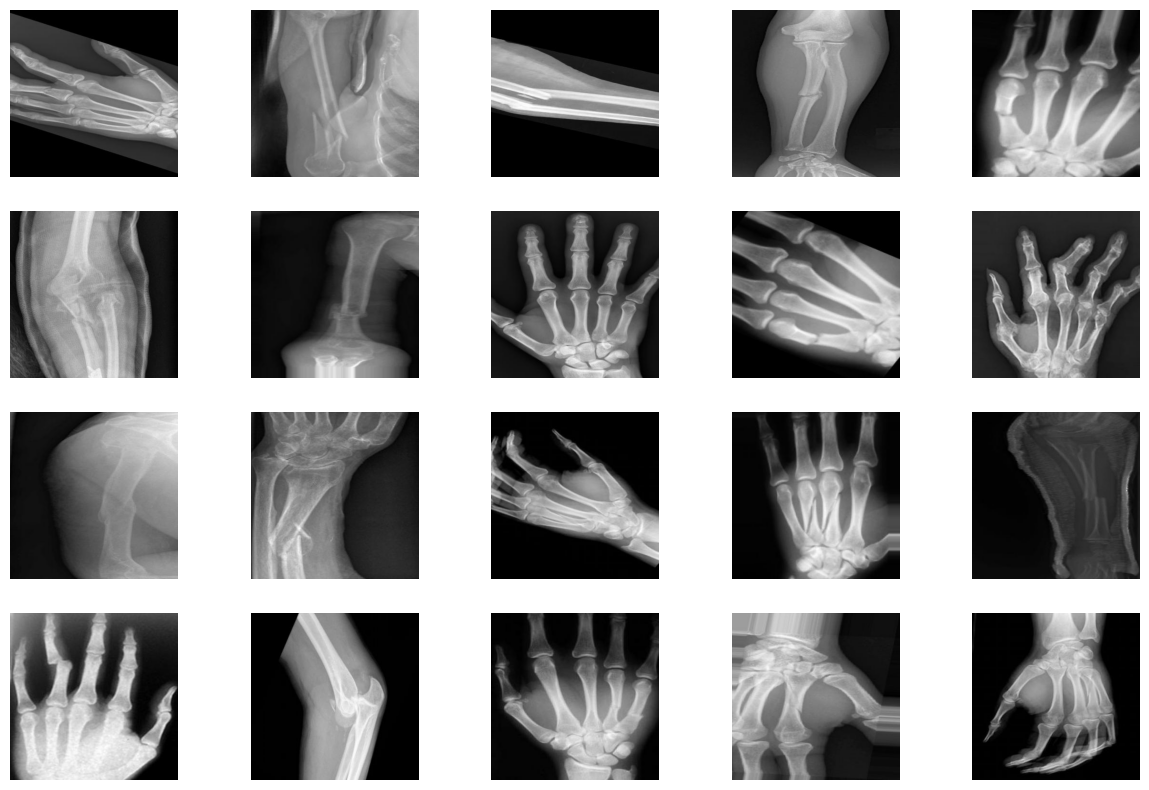

In [9]:
random_imgs(test_dir)

## **Training Model YOLO**

In [10]:
# Konfigurasi dataset YAML
dataset_yaml = """
path: D:\Document\Viskom\Projek UAS\FrakturTulang
train: train\images
val: valid\images

nc: 1
names: ['Fracture']
"""

# Simpan file konfigurasi dataset
with open('dataset.yaml', 'w') as f:
    f.write(dataset_yaml)

In [11]:
# Inisialisasi model YOLO
model = YOLO('yolov8s.pt')

# Pelatihan model
model.train(
    data='dataset.yaml',  # Path ke file dataset YAML
    epochs=30,            # Jumlah epoch
    batch=16,             # Ukuran batch
    imgsz=640,            # Resolusi gambar
    name='FractureS',     # Nama eksperimen
    cache=True            # Cache data untuk mempercepat pelatihan
)

100%|██████████| 21.5M/21.5M [01:49<00:00, 206kB/s] 


New https://pypi.org/project/ultralytics/8.3.51 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.10.11 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=dataset.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=FractureS, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning D:\Document\Viskom\Projek UAS\FrakturTulang\train\labels.cache... 781 images, 1 backgrounds, 0 corrupt: 100%|██████████| 781/781 [00:00<?, ?it/s]


WARNING  cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.9GB RAM): 100%|██████████| 781/781 [00:00<00:00, 797.92it/s]
val: Scanning D:\Document\Viskom\Projek UAS\FrakturTulang\valid\labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100%|██████████| 99/99 [00:00<?, ?it/s]


WARNING  cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 99/99 [00:00<00:00, 935.85it/s]


Plotting labels to runs\detect\FractureS\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\FractureS
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      2.611       4.84      2.197         16        640: 100%|██████████| 49/49 [08:57<00:00, 10.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.54s/it]

                   all         99        117      0.106     0.0513      0.013    0.00426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      2.442      3.126      2.009         22        640: 100%|██████████| 49/49 [08:54<00:00, 10.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.99s/it]

                   all         99        117     0.0929     0.0855     0.0242    0.00843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      2.429      2.839      2.063         24        640: 100%|██████████| 49/49 [08:33<00:00, 10.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.11s/it]

                   all         99        117     0.0325      0.103     0.0122    0.00302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      2.351      2.645      2.063         25        640: 100%|██████████| 49/49 [08:26<00:00, 10.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.33s/it]

                   all         99        117    0.00437      0.342    0.00296    0.00088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      2.272      2.486      1.975         19        640: 100%|██████████| 49/49 [08:29<00:00, 10.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.04s/it]

                   all         99        117     0.0971      0.094     0.0469     0.0191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      2.202      2.371      1.963         15        640: 100%|██████████| 49/49 [08:30<00:00, 10.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.06s/it]

                   all         99        117     0.0793      0.179      0.048      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      2.117      2.208       1.87         19        640: 100%|██████████| 49/49 [08:31<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.99s/it]

                   all         99        117      0.326      0.274      0.251     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      2.034      2.027      1.839         21        640: 100%|██████████| 49/49 [08:29<00:00, 10.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.19s/it]

                   all         99        117      0.322      0.308      0.237     0.0908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G       1.93      1.837      1.755         24        640: 100%|██████████| 49/49 [08:29<00:00, 10.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.02s/it]

                   all         99        117      0.363      0.333      0.278     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.903       1.75      1.746         20        640: 100%|██████████| 49/49 [08:27<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.06s/it]

                   all         99        117       0.49      0.393      0.376      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G       1.81      1.671      1.716         24        640: 100%|██████████| 49/49 [08:28<00:00, 10.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.02s/it]

                   all         99        117      0.577      0.308       0.36      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G       1.77      1.544      1.637         26        640: 100%|██████████| 49/49 [08:26<00:00, 10.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.04s/it]

                   all         99        117      0.437      0.385      0.371      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.697       1.51      1.589         22        640: 100%|██████████| 49/49 [08:30<00:00, 10.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.07s/it]

                   all         99        117      0.476      0.404      0.422      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.644      1.418      1.569         22        640: 100%|██████████| 49/49 [08:25<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.96s/it]

                   all         99        117      0.511      0.447      0.425      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.635      1.324      1.546         17        640: 100%|██████████| 49/49 [08:24<00:00, 10.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.97s/it]

                   all         99        117      0.569      0.384      0.395      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.614       1.36      1.557         20        640: 100%|██████████| 49/49 [08:25<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.96s/it]

                   all         99        117      0.538      0.402      0.392      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.545       1.25      1.526         16        640: 100%|██████████| 49/49 [08:27<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.93s/it]

                   all         99        117      0.747       0.35      0.467      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.528      1.226        1.5         26        640: 100%|██████████| 49/49 [08:26<00:00, 10.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.01s/it]

                   all         99        117      0.622      0.487      0.504      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G       1.47       1.15      1.462         14        640: 100%|██████████| 49/49 [08:26<00:00, 10.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.99s/it]

                   all         99        117      0.729      0.427      0.532      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.364      1.067      1.427         22        640: 100%|██████████| 49/49 [08:25<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.16s/it]

                   all         99        117      0.646      0.487      0.515      0.208


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      2.015      1.672      1.999         15        640: 100%|██████████| 49/49 [08:23<00:00, 10.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.03s/it]

                   all         99        117      0.567      0.521      0.508      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.906      1.621      1.825         17        640: 100%|██████████| 49/49 [08:27<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.02s/it]

                   all         99        117       0.67       0.52      0.589      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.872      1.471      1.856         15        640: 100%|██████████| 49/49 [08:26<00:00, 10.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  6.00s/it]

                   all         99        117      0.677      0.501      0.564      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      1.864      1.422       1.83         14        640: 100%|██████████| 49/49 [08:24<00:00, 10.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.01s/it]

                   all         99        117      0.747      0.607       0.67      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      1.817      1.357      1.814         17        640: 100%|██████████| 49/49 [08:27<00:00, 10.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.00s/it]

                   all         99        117      0.755      0.632      0.689      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      1.775      1.301      1.764         15        640: 100%|██████████| 49/49 [08:25<00:00, 10.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.99s/it]

                   all         99        117      0.818      0.615      0.721      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      1.761       1.24      1.743         16        640: 100%|██████████| 49/49 [08:24<00:00, 10.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.07s/it]

                   all         99        117      0.827      0.641      0.733      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G       1.73      1.209      1.717         14        640: 100%|██████████| 49/49 [08:23<00:00, 10.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.06s/it]

                   all         99        117      0.833       0.65      0.745      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      1.668      1.162      1.672         15        640: 100%|██████████| 49/49 [08:26<00:00, 10.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.99s/it]

                   all         99        117      0.827       0.65      0.755      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      1.653      1.116      1.664         16        640: 100%|██████████| 49/49 [08:24<00:00, 10.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.98s/it]

                   all         99        117      0.876      0.692      0.772      0.342



30 epochs completed in 4.452 hours.
Optimizer stripped from runs\detect\FractureS\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\FractureS\weights\best.pt, 22.5MB

Validating runs\detect\FractureS\weights\best.pt...
Ultralytics 8.3.49  Python-3.10.11 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.26s/it]


                   all         99        117      0.876      0.692      0.772      0.341
Speed: 2.9ms preprocess, 203.1ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\FractureS


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002037FEBE620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

## **Evaluasi Model**

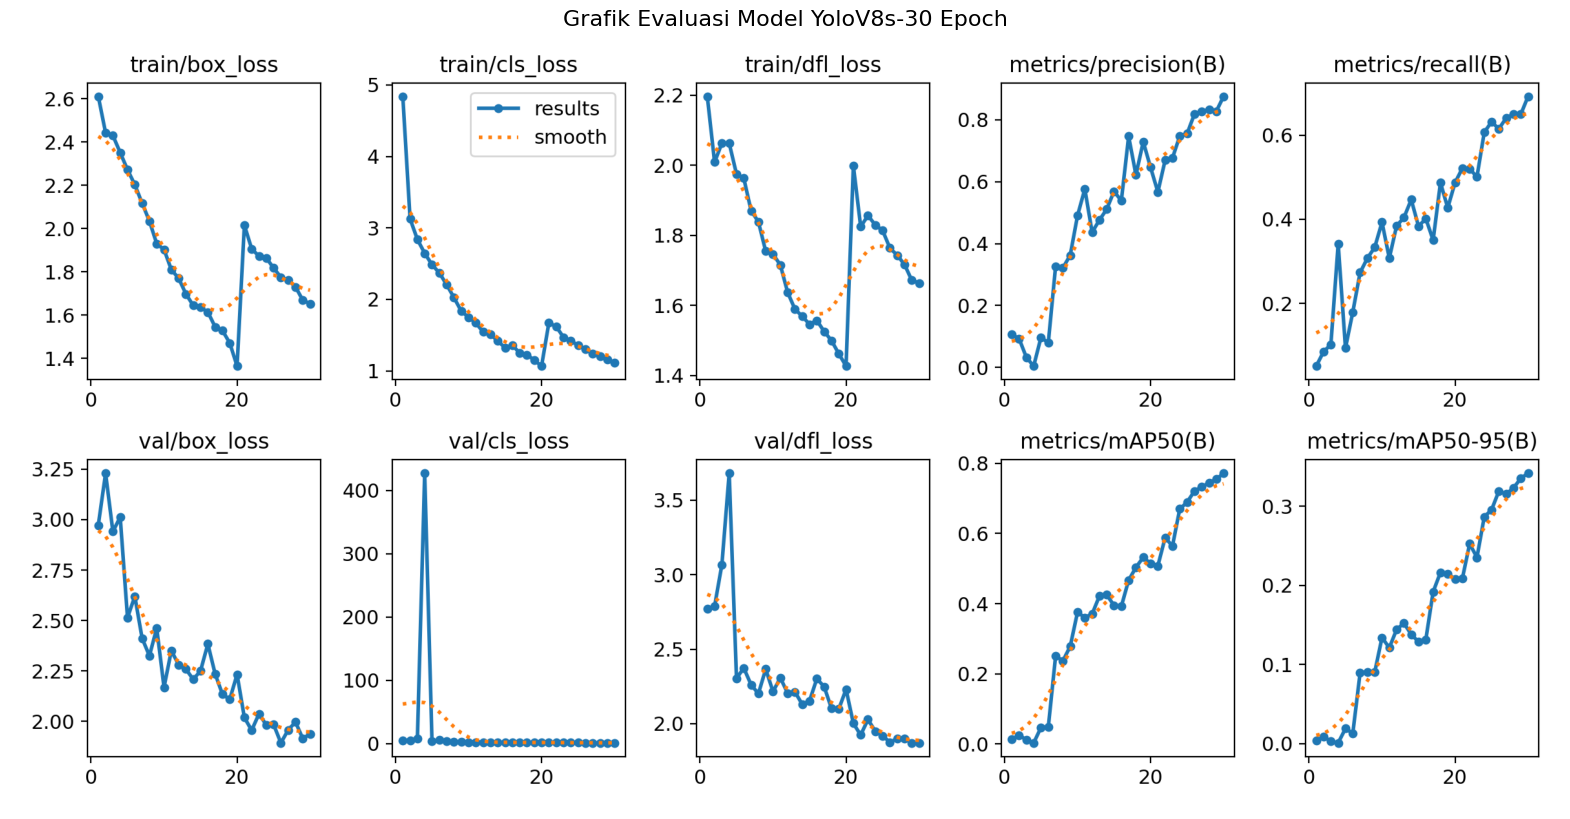

In [4]:
eval = cv2.imread(r'runs\detect\FractureS\results.png')

# Convert warna dari BGR ke RGB (OpenCV menggunakan BGR secara default)
eval_rgb = cv2.cvtColor(eval, cv2.COLOR_BGR2RGB)

# Tampilkan gambar menggunakan Matplotlib
plt.figure(figsize=(20, 20))
plt.imshow(eval_rgb)
plt.axis('off')
plt.title("Grafik Evaluasi Model YoloV8s-30 Epoch", fontsize=16)
plt.show()

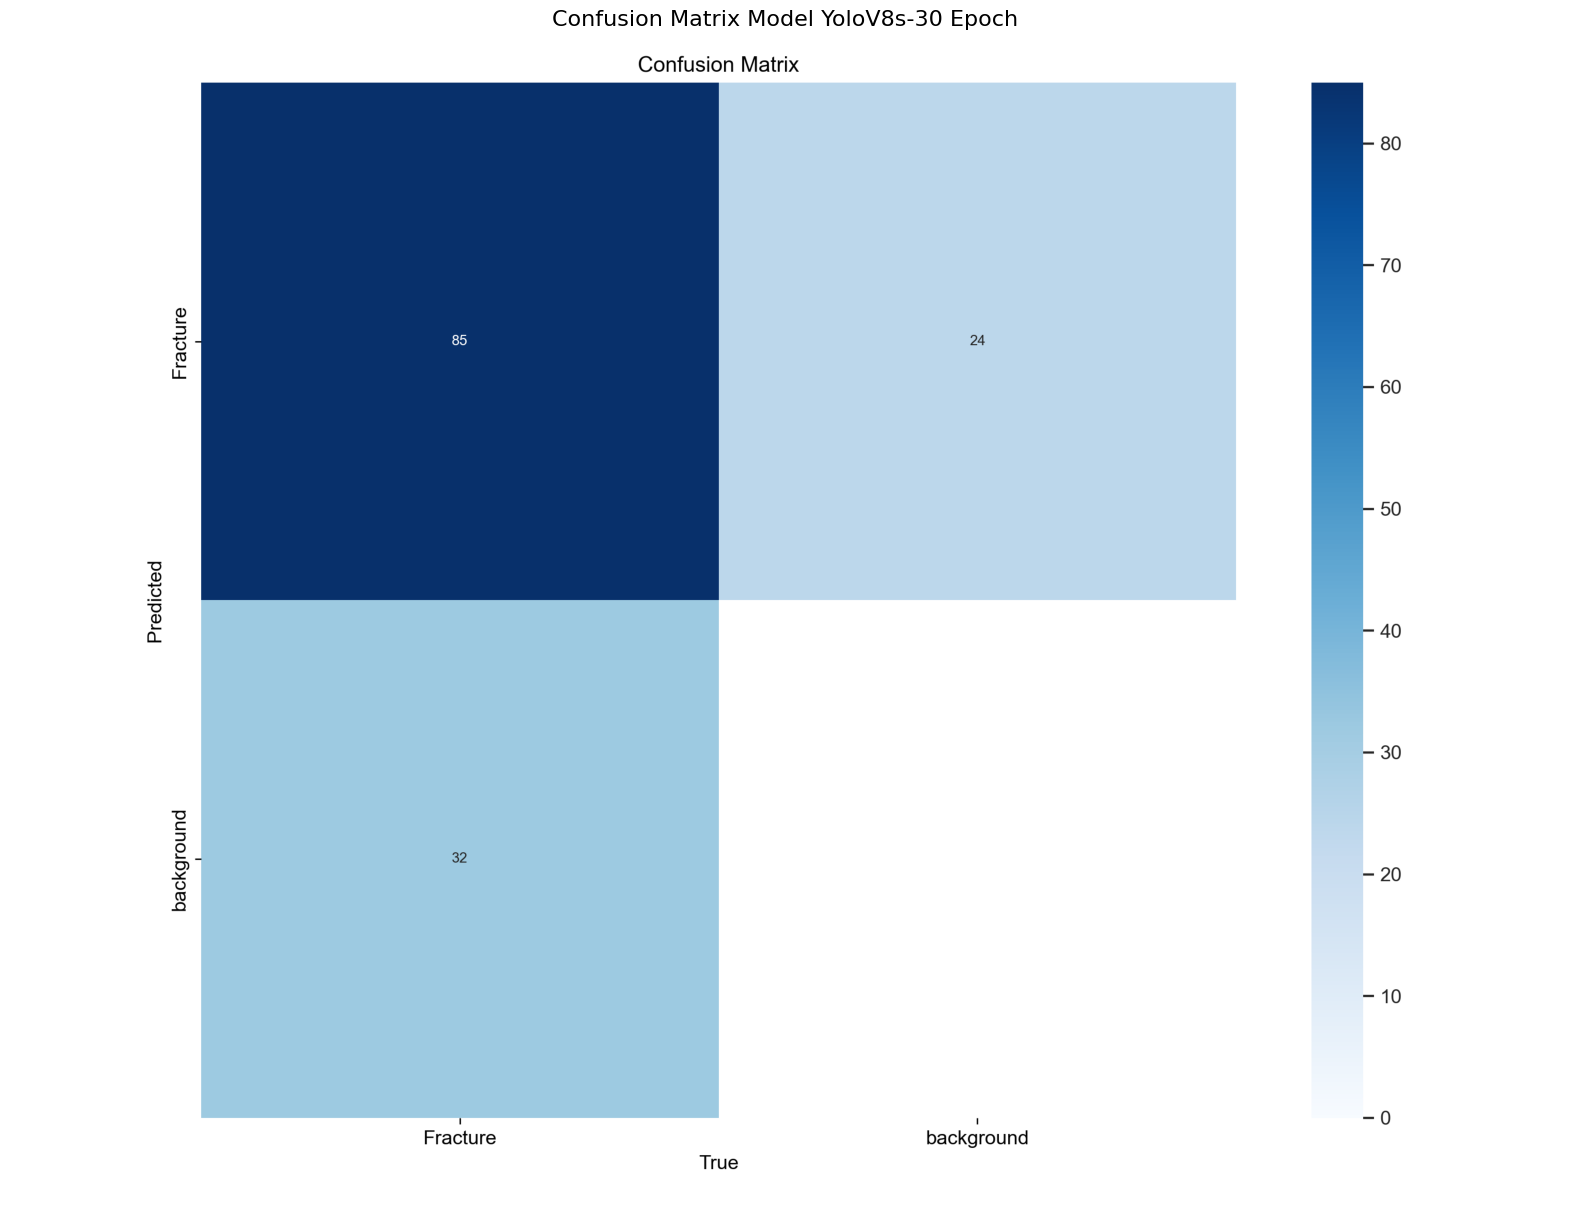

In [5]:
cf = cv2.imread(r'runs\detect\FractureS\confusion_matrix.png')

# Convert warna dari BGR ke RGB (OpenCV menggunakan BGR secara default)
cf_rgb = cv2.cvtColor(cf, cv2.COLOR_BGR2RGB)

# Tampilkan gambar menggunakan Matplotlib
plt.figure(figsize=(20, 20))
plt.imshow(cf_rgb)
plt.axis('off')
plt.title("Confusion Matrix Model YoloV8s-30 Epoch", fontsize=16)
plt.show()

## **Testing ke Gambar Baru**

In [2]:
# Load model terbaik (best.pt)
model8s_30 = YOLO(r'runs\detect\FractureS\weights\best.pt')

In [7]:
# Jalankan prediksi pada data test (minimal coef detection 25%)
results = model8s_30.predict(source=test_dir, conf=0.25, save=True)  # save=True menyimpan hasil deteksi


image 1/156 d:\Document\Viskom\Projek UAS\FrakturTulang\test\images\all_0_1142_png.rf.4ba726be944734d8df455b77cc49a54f.jpg: 640x640 2 Fractures, 207.7ms
image 2/156 d:\Document\Viskom\Projek UAS\FrakturTulang\test\images\all_0_1285_png.rf.199b6d0816f2fddd475e6c3e6047ebdf.jpg: 640x640 (no detections), 113.8ms
image 3/156 d:\Document\Viskom\Projek UAS\FrakturTulang\test\images\all_0_157_png.rf.fa0c268e78529c31b78522a3a718e992.jpg: 640x640 1 Fracture, 122.4ms
image 4/156 d:\Document\Viskom\Projek UAS\FrakturTulang\test\images\all_0_1640_png.rf.b2d829f022772b47dd885f984ea1de26.jpg: 640x640 1 Fracture, 116.4ms
image 5/156 d:\Document\Viskom\Projek UAS\FrakturTulang\test\images\all_0_2324_png.rf.64c3541a9e2a4eafb1730138f27ac1e5.jpg: 640x640 2 Fractures, 124.7ms
image 6/156 d:\Document\Viskom\Projek UAS\FrakturTulang\test\images\all_0_3493_png.rf.fb4c962ad20b7c43bc91ffb4a085a056.jpg: 640x640 1 Fracture, 112.7ms
image 7/156 d:\Document\Viskom\Projek UAS\FrakturTulang\test\images\all_0_380_png

In [8]:
# Proses hasil deteksi
detected_count = 0  # Counter untuk gambar yang berhasil terdeteksi fracture

# Iterasi melalui hasil deteksi
for result in results:
    boxes = result.boxes.xywhn  # Bounding boxes dalam format (x_center, y_center, width, height, conf, class_id)
    classes = result.boxes.cls.cpu().numpy()  # Ambil ID kelas dari hasil deteksi
    
    # Periksa apakah ada deteksi dengan kelas "Fracture" (contoh ID kelas: 0)
    if any(cls == 0 for cls in classes):  # Ganti 0 dengan ID class untuk "Fracture"
        detected_count += 1

print(f"Jumlah gambar yang berhasil terdeteksi fracture: {detected_count}")

Jumlah gambar yang berhasil terdeteksi fracture: 134


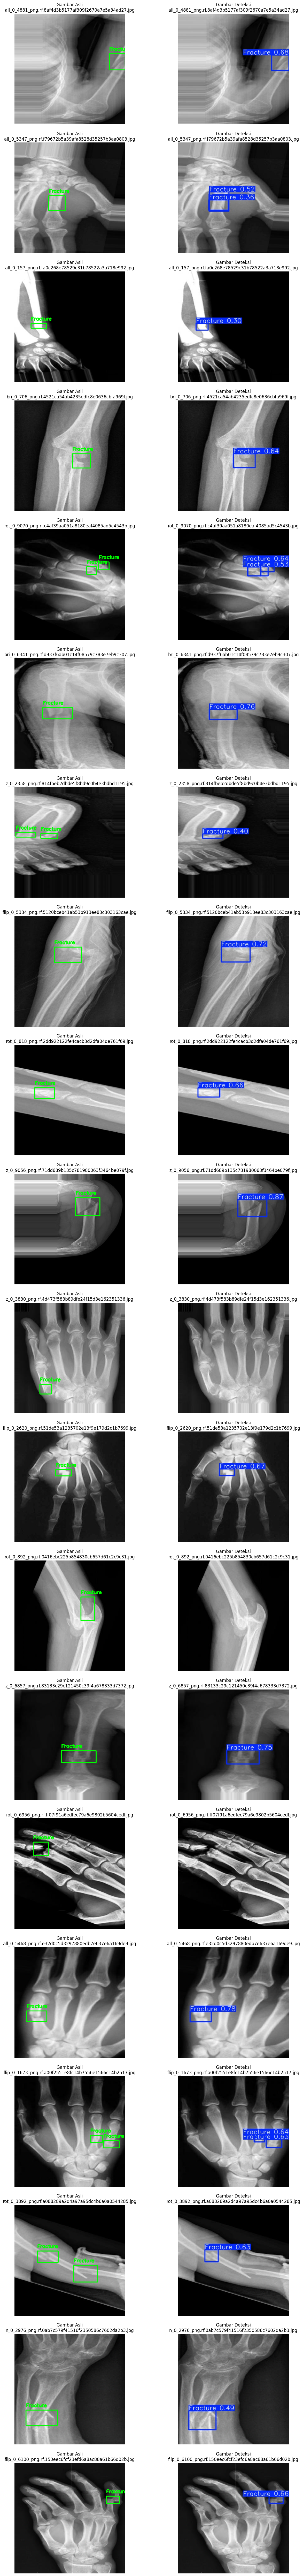

In [9]:
def read_yolo_labels(label_path):
    """
    Membaca file label YOLO format .txt.
    Args:
        label_path (str): Path file label.
    Returns:
        list: List bounding box dengan format [class, x_center, y_center, width, height].
    """
    labels = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                labels.append([float(x) for x in line.strip().split()])
    return labels

def draw_boxes(image, boxes, labels_dict, color=(0, 255, 0)):
    """
    Menggambar bounding boxes pada gambar.
    Args:
        image (numpy array): Gambar.
        boxes (list): List bounding box [class, x_center, y_center, width, height].
        labels_dict (dict): Pemetaan ID class ke label.
        color (tuple): Warna bounding box.
    Returns:
        numpy array: Gambar dengan bounding box.
    """
    h, w, _ = image.shape
    for box in boxes:
        cls, x_center, y_center, box_width, box_height = box
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)
        label = labels_dict[int(cls)]
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

def compare_detections(test_dir, labels_dir, predict_dir, labels_dict, num_samples=20):
    """
    Membandingkan gambar asli (dengan label) dan hasil prediksi.
    
    Args:
        test_dir (str): Direktori gambar asli.
        labels_dir (str): Direktori file label asli.
        predict_dir (str): Direktori gambar hasil prediksi.
        labels_dict (dict): Pemetaan ID class ke label.
        num_samples (int): Jumlah gambar untuk dibandingkan.
    """
    
    # Dapatkan semua gambar di data test
    test_images = [img for img in os.listdir(test_dir) if img.endswith(('.jpg', '.png', '.jpeg'))]

    # Pilih gambar secara acak
    sampled_images = random.sample(test_images, min(num_samples, len(test_images)))

    # Atur grid layout untuk visualisasi
    rows = len(sampled_images)  # Satu baris per gambar
    plt.figure(figsize=(15, rows * 5))  # Sesuaikan tinggi gambar dengan jumlah baris

    for i, img_name in enumerate(sampled_images):
        # Path ke gambar asli dan file label
        img_path = os.path.join(test_dir, img_name)
        label_path = os.path.join(labels_dir, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Path ke gambar hasil prediksi
        predict_img_path = os.path.join(predict_dir, img_name)

        # Load gambar asli
        original_img = cv2.imread(img_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

        # Load bounding boxes dari file label asli
        original_boxes = read_yolo_labels(label_path)
        labeled_img = draw_boxes(original_img.copy(), original_boxes, labels_dict, color=(0, 255, 0))

        # Load gambar hasil prediksi
        if os.path.exists(predict_img_path):
            predicted_img = cv2.imread(predict_img_path)
            predicted_img = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)
        else:
            predicted_img = None

        # Plot gambar
        plt.subplot(rows, 2, i * 2 + 1)
        plt.imshow(labeled_img)
        plt.title(f"Gambar Asli\n{img_name}", fontsize=12)
        plt.axis('off')

        plt.subplot(rows, 2, i * 2 + 2)
        if predicted_img is not None:
            plt.imshow(predicted_img)
            plt.title(f"Gambar Deteksi\n{img_name}", fontsize=12)
        else:
            plt.imshow(original_img)
            plt.title(f"Tidak Terdeteksi\n{img_name}", fontsize=12)
        plt.axis('off')

    plt.tight_layout(pad=2.0)
    plt.show()

# Pemetaan ID class ke label
labels_dict = {0: 'Fracture'}

# Pemanggilan fungsi
compare_detections(
    test_dir='FrakturTulang/test/images',
    labels_dir='FrakturTulang/test/labels',
    predict_dir='runs/detect/predict4',
    labels_dict=labels_dict
)


## **Testing ke Gambar X-ray Patah Tulang Random dari Google**


image 1/1 d:\Document\Viskom\Projek UAS\Patah1.jpg: 448x640 1 Fracture, 97.6ms
Speed: 2.0ms preprocess, 97.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


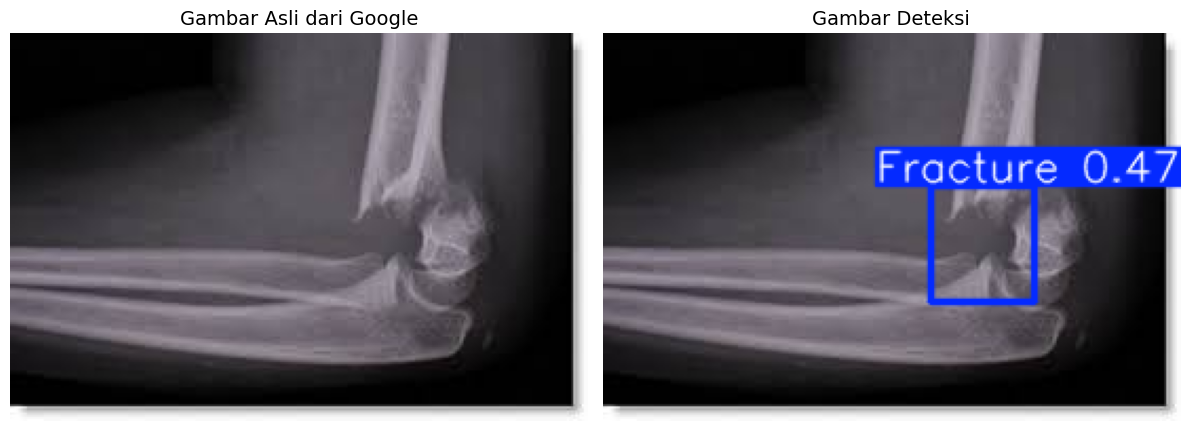

In [10]:
# Deteksi pada gambar baru dari google
prediksi1= model8s_30.predict(
    source='Patah1.jpg',
    conf=0.25,  # Confidence threshold
    save=False
)

# Ambil gambar asli dan hasil deteksi
for result in prediksi1:
    img_original = result.orig_img  # Gambar asli
    img_detected = result.plot()    # Gambar dengan bounding box hasil deteksi

    # Konversi BGR ke RGB untuk Matplotlib
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_detected_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)

    # Visualisasi hasil
    plt.figure(figsize=(12, 6))
    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.axis('off')
    plt.title("Gambar Asli dari Google", fontsize=14)

    # Gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(img_detected_rgb)
    plt.axis('off')
    plt.title("Gambar Deteksi", fontsize=14)

    plt.tight_layout()
    plt.show()


image 1/1 d:\Document\Viskom\Projek UAS\Patah2.jpg: 640x352 2 Fractures, 89.3ms
Speed: 2.3ms preprocess, 89.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 352)


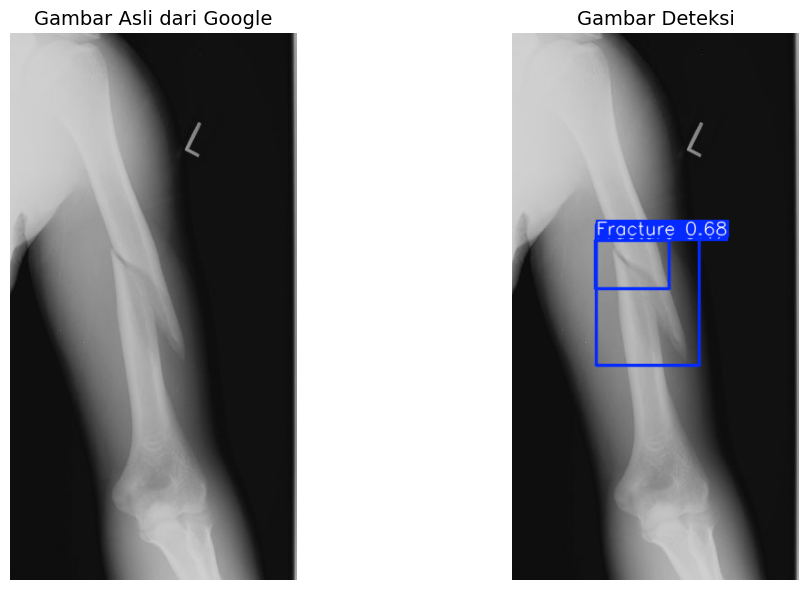

In [11]:
# Deteksi pada gambar baru dari google
prediksi1= model8s_30.predict(
    source='Patah2.jpg',
    conf=0.25,  # Confidence threshold
    save=False
)

# Ambil gambar asli dan hasil deteksi
for result in prediksi1:
    img_original = result.orig_img  # Gambar asli
    img_detected = result.plot()    # Gambar dengan bounding box hasil deteksi

    # Konversi BGR ke RGB untuk Matplotlib
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_detected_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)

    # Visualisasi hasil
    plt.figure(figsize=(12, 6))
    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.axis('off')
    plt.title("Gambar Asli dari Google", fontsize=14)

    # Gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(img_detected_rgb)
    plt.axis('off')
    plt.title("Gambar Deteksi", fontsize=14)

    plt.tight_layout()
    plt.show()


image 1/1 d:\Document\Viskom\Projek UAS\Patah3.jpg: 640x640 1 Fracture, 136.1ms
Speed: 6.0ms preprocess, 136.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


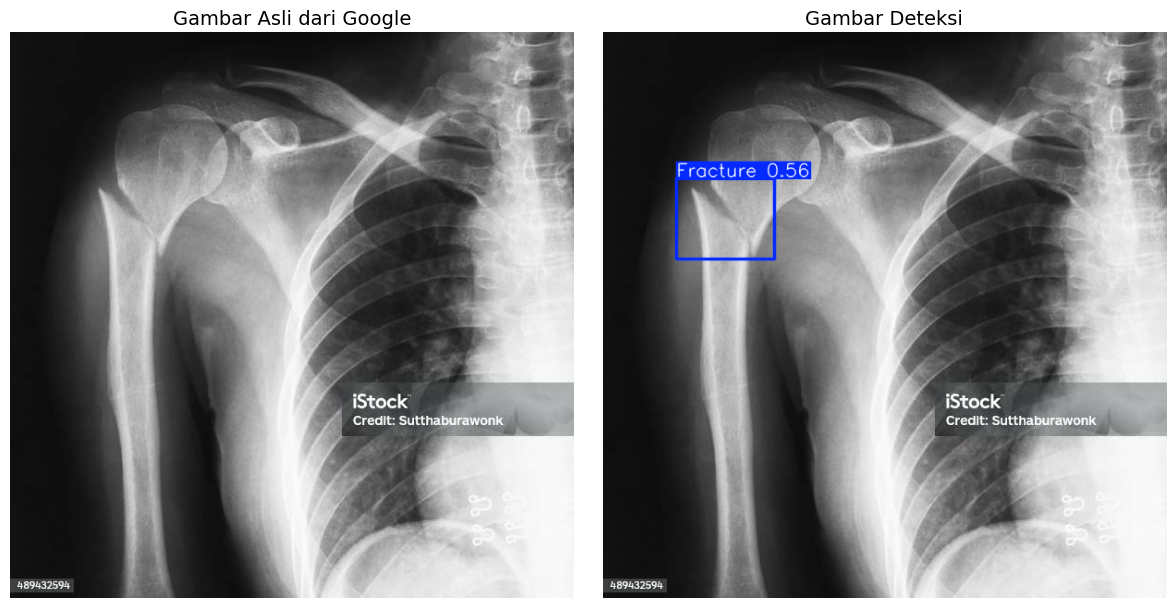

In [12]:
# Deteksi pada gambar baru dari google
prediksi1= model8s_30.predict(
    source='Patah3.jpg',
    conf=0.25,  # Confidence threshold
    save=False
)

# Ambil gambar asli dan hasil deteksi
for result in prediksi1:
    img_original = result.orig_img  # Gambar asli
    img_detected = result.plot()    # Gambar dengan bounding box hasil deteksi

    # Konversi BGR ke RGB untuk Matplotlib
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_detected_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)

    # Visualisasi hasil
    plt.figure(figsize=(12, 6))
    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.axis('off')
    plt.title("Gambar Asli dari Google", fontsize=14)

    # Gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(img_detected_rgb)
    plt.axis('off')
    plt.title("Gambar Deteksi", fontsize=14)

    plt.tight_layout()
    plt.show()


image 1/1 d:\Document\Viskom\Projek UAS\Patah4.jpg: 640x288 1 Fracture, 82.2ms
Speed: 1.0ms preprocess, 82.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 288)


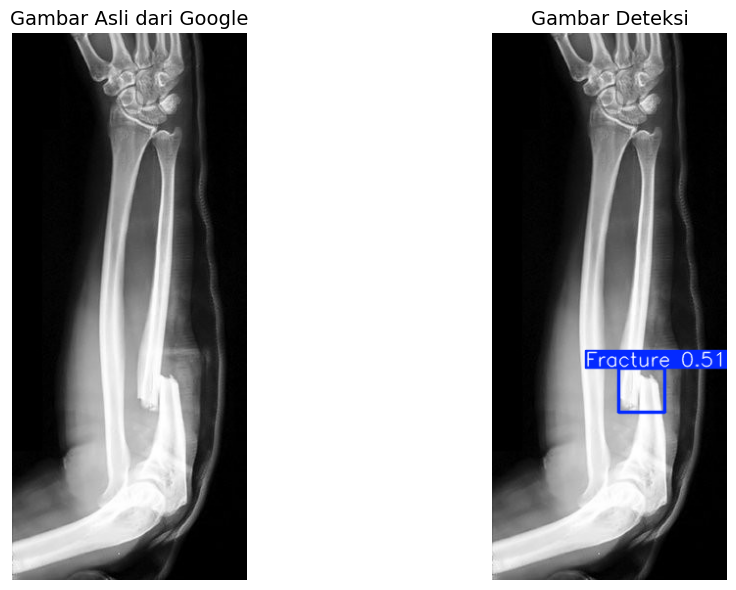

In [13]:
# Deteksi pada gambar baru dari google
prediksi1= model8s_30.predict(
    source='Patah4.jpg',
    conf=0.25,  # Confidence threshold
    save=False
)

# Ambil gambar asli dan hasil deteksi
for result in prediksi1:
    img_original = result.orig_img  # Gambar asli
    img_detected = result.plot()    # Gambar dengan bounding box hasil deteksi

    # Konversi BGR ke RGB untuk Matplotlib
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_detected_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)

    # Visualisasi hasil
    plt.figure(figsize=(12, 6))
    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.axis('off')
    plt.title("Gambar Asli dari Google", fontsize=14)

    # Gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(img_detected_rgb)
    plt.axis('off')
    plt.title("Gambar Deteksi", fontsize=14)

    plt.tight_layout()
    plt.show()


image 1/1 d:\Document\Viskom\Projek UAS\Patah5.jpg: 640x640 3 Fractures, 131.5ms
Speed: 5.0ms preprocess, 131.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


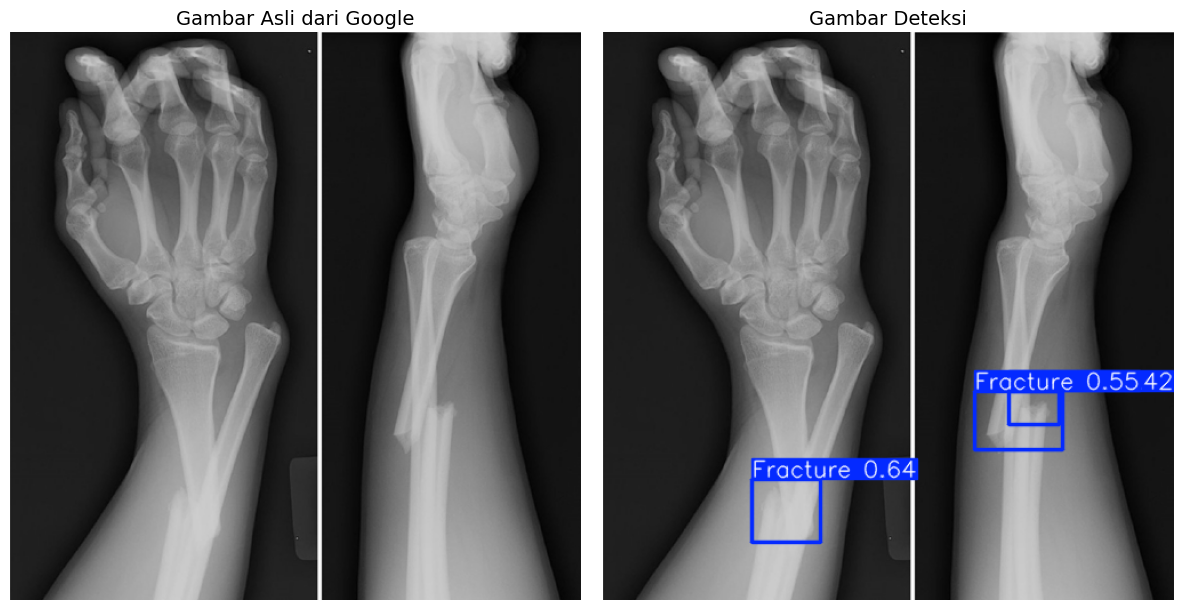

In [14]:
# Deteksi pada gambar baru dari google
prediksi1= model8s_30.predict(
    source='Patah5.jpg',
    conf=0.25,  # Confidence threshold
    save=False
)

# Ambil gambar asli dan hasil deteksi
for result in prediksi1:
    img_original = result.orig_img  # Gambar asli
    img_detected = result.plot()    # Gambar dengan bounding box hasil deteksi

    # Konversi BGR ke RGB untuk Matplotlib
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_detected_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)

    # Visualisasi hasil
    plt.figure(figsize=(12, 6))
    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.axis('off')
    plt.title("Gambar Asli dari Google", fontsize=14)

    # Gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(img_detected_rgb)
    plt.axis('off')
    plt.title("Gambar Deteksi", fontsize=14)

    plt.tight_layout()
    plt.show()


image 1/1 d:\Document\Viskom\Projek UAS\Patah6.jpg: 640x384 1 Fracture, 263.8ms
Speed: 11.9ms preprocess, 263.8ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 384)


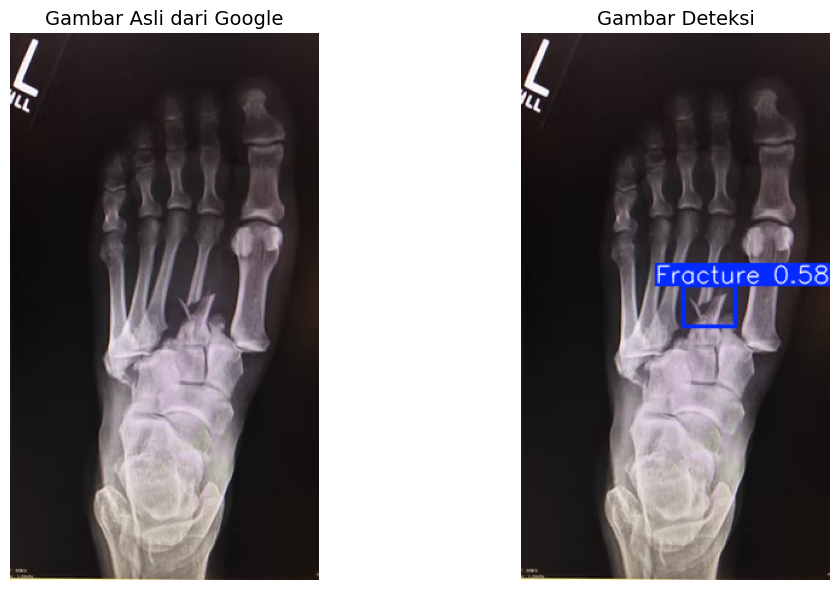

In [3]:
# Deteksi pada gambar baru dari google
prediksi1= model8s_30.predict(
    source='Patah6.jpg',
    conf=0.25,  # Confidence threshold
    save=False
)

# Ambil gambar asli dan hasil deteksi
for result in prediksi1:
    img_original = result.orig_img  # Gambar asli
    img_detected = result.plot()    # Gambar dengan bounding box hasil deteksi

    # Konversi BGR ke RGB untuk Matplotlib
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_detected_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)

    # Visualisasi hasil
    plt.figure(figsize=(12, 6))
    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.axis('off')
    plt.title("Gambar Asli dari Google", fontsize=14)

    # Gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(img_detected_rgb)
    plt.axis('off')
    plt.title("Gambar Deteksi", fontsize=14)

    plt.tight_layout()
    plt.show()


image 1/1 d:\Document\Viskom\Projek UAS\Patah7.jpg: 640x448 (no detections), 235.8ms
Speed: 4.0ms preprocess, 235.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)


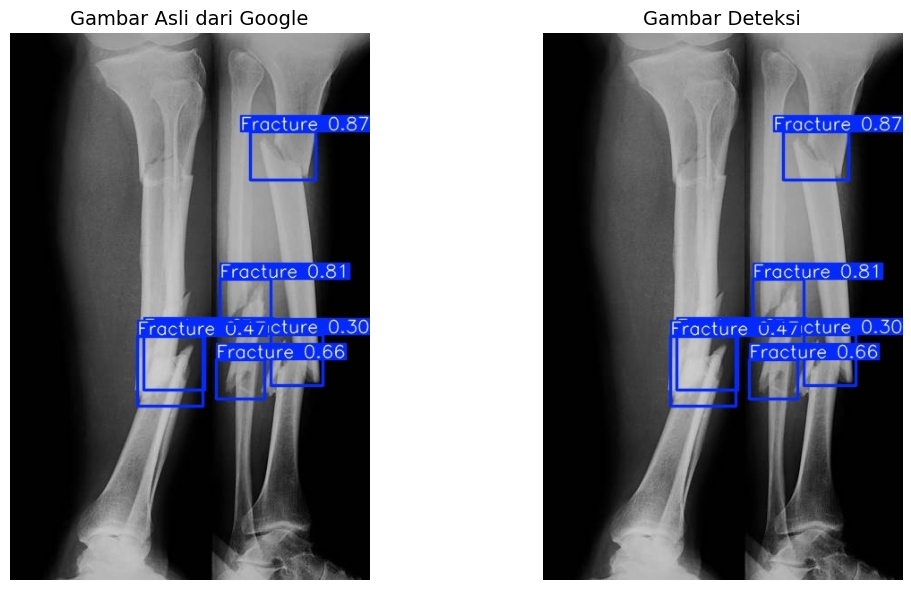

In [4]:
# Deteksi pada gambar baru dari google
prediksi1= model8s_30.predict(
    source='Patah7.jpg',
    conf=0.25,  # Confidence threshold
    save=False
)

# Ambil gambar asli dan hasil deteksi
for result in prediksi1:
    img_original = result.orig_img  # Gambar asli
    img_detected = result.plot()    # Gambar dengan bounding box hasil deteksi

    # Konversi BGR ke RGB untuk Matplotlib
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_detected_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)

    # Visualisasi hasil
    plt.figure(figsize=(12, 6))
    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.axis('off')
    plt.title("Gambar Asli dari Google", fontsize=14)

    # Gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(img_detected_rgb)
    plt.axis('off')
    plt.title("Gambar Deteksi", fontsize=14)

    plt.tight_layout()
    plt.show()


image 1/1 d:\Document\Viskom\Projek UAS\Patah8.jpg: 544x640 2 Fractures, 279.7ms
Speed: 4.0ms preprocess, 279.7ms inference, 4.1ms postprocess per image at shape (1, 3, 544, 640)


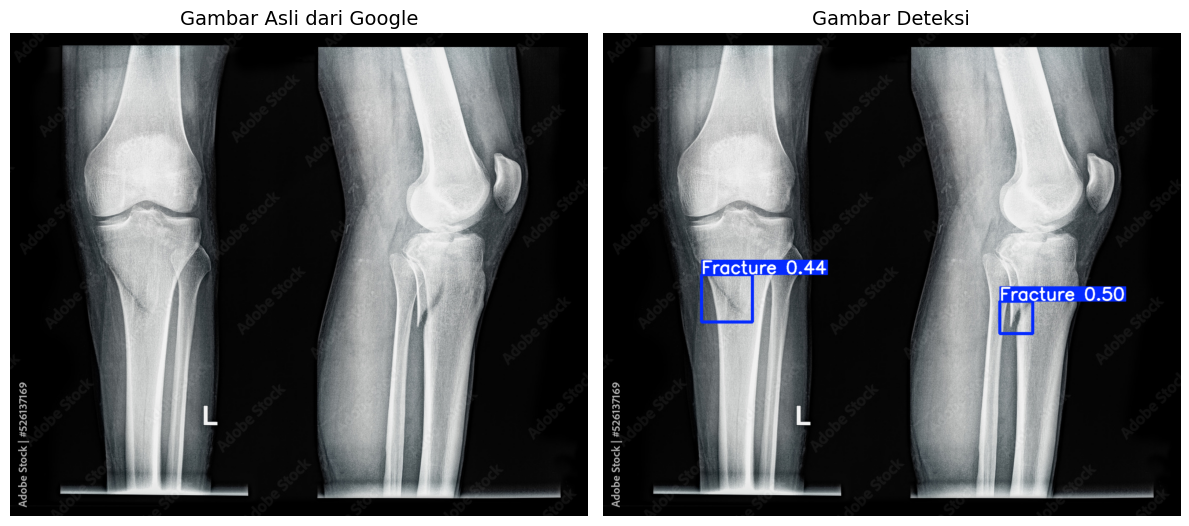

In [5]:
# Deteksi pada gambar baru dari google
prediksi1= model8s_30.predict(
    source='Patah8.jpg',
    conf=0.25,  # Confidence threshold
    save=False
)

# Ambil gambar asli dan hasil deteksi
for result in prediksi1:
    img_original = result.orig_img  # Gambar asli
    img_detected = result.plot()    # Gambar dengan bounding box hasil deteksi

    # Konversi BGR ke RGB untuk Matplotlib
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_detected_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)

    # Visualisasi hasil
    plt.figure(figsize=(12, 6))
    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.axis('off')
    plt.title("Gambar Asli dari Google", fontsize=14)

    # Gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(img_detected_rgb)
    plt.axis('off')
    plt.title("Gambar Deteksi", fontsize=14)

    plt.tight_layout()
    plt.show()